<a href="https://colab.research.google.com/github/HamsWael/NLP_Proj/blob/main/NLP_Project_MS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Libraries and Dataset**

In [1]:
import pandas as pd
import nltk
#used for tokenization
nltk.download('punkt')
from nltk.tokenize import word_tokenize
#used for lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
#used for Stemming
from nltk.stem import PorterStemmer
#used for removing stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
#used for removing punctuations
import string
#used for POS Tagging
nltk.download('averaged_perceptron_tagger')
#used for visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.preprocessing import StandardScaler

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [2]:
df1 = pd.read_csv('/content/DataSets/train.csv')
df2 = pd.read_csv('/content/DataSets/test.csv')
df3 = pd.read_csv('/content/DataSets/valid.csv')

In [3]:
df = pd.concat([df1, df2, df3], axis=0)

In [4]:
df

,Id,Title,Body,Score,ViewCount,Label,LabelNum
0,197234,Drop\stop mobile data connection (non-wifi) by...,<p>Can I set Android 4.4.2 to drop mobile data...,0,34,android,0
1,114800,How to automatically crop text messages when S...,<p>Is there a way to prevent the Messages app ...,0,836,android,0
2,124532,Can't find text message that was to a group,<p>When John Doe texts to a group that include...,1,28,android,0
3,193875,Can't store contacts on my Android phone,<p>I was going through all of my installed app...,0,158,android,0
4,50332,Dropbox on Samsung Galaxy - where is the Setti...,"<p>On a Sony Xperia, the settings button in Dr...",1,963,android,0
...,...,...,...,...,...,...,...
11003,218151,Disable vibrations for notifications on Xiaomi...,<p>I have a Xiaomi Mi A3 on Android 9. I want ...,1,197,android,0
11004,102309,Download and run Android APK files,<p>I want to download BitTorrent Sync to synch...,0,408,android,0
11005,25096,Android apps keep crashing with android.databa...,"<p>Starting yesterday, my Galaxy s2 device run...",8,3374,android,0
11006,268441,Can you get viruses on iPhone from downloaded ...,<p>I downloaded an app for downloading things ...,1,1028,ios,1


## **Data Inspection and Cleaning (Dropping Duplicates and Null Values)**

In [5]:
num_duplicates = df.duplicated().sum()
num_duplicates

#Therefore, no duplicates are found in this dataset

0

In [6]:
df.isna().sum()
#No null values

Id           0
Title        0
Body         0
Score        0
ViewCount    0
Label        0
LabelNum     0
dtype: int64

In [7]:
#Dropping unnecessary columns
#Drop ID column since its a unique identifier and would overfit/skew the model
df= df.drop('Id', axis=1)

In [8]:
#Dropping Label as we would have encoded it to what already exists in LabelNum Column
#0---> Android
#1---> ios
#Score and ViewCount also has nth to do with the question answering and classification
df= df.drop(['Score', 'ViewCount','Label'], axis=1)
df

,Title,Body,LabelNum
0,Drop\stop mobile data connection (non-wifi) by...,<p>Can I set Android 4.4.2 to drop mobile data...,0
1,How to automatically crop text messages when S...,<p>Is there a way to prevent the Messages app ...,0
2,Can't find text message that was to a group,<p>When John Doe texts to a group that include...,0
3,Can't store contacts on my Android phone,<p>I was going through all of my installed app...,0
4,Dropbox on Samsung Galaxy - where is the Setti...,"<p>On a Sony Xperia, the settings button in Dr...",0
...,...,...,...
11003,Disable vibrations for notifications on Xiaomi...,<p>I have a Xiaomi Mi A3 on Android 9. I want ...,0
11004,Download and run Android APK files,<p>I want to download BitTorrent Sync to synch...,0
11005,Android apps keep crashing with android.databa...,"<p>Starting yesterday, my Galaxy s2 device run...",0
11006,Can you get viruses on iPhone from downloaded ...,<p>I downloaded an app for downloading things ...,1


In [9]:
df['Body'] = df['Body'].str.replace('<p>', '')
df

,Title,Body,LabelNum
0,Drop\stop mobile data connection (non-wifi) by...,Can I set Android 4.4.2 to drop mobile data co...,0
1,How to automatically crop text messages when S...,Is there a way to prevent the Messages app fro...,0
2,Can't find text message that was to a group,When John Doe texts to a group that includes m...,0
3,Can't store contacts on my Android phone,I was going through all of my installed applic...,0
4,Dropbox on Samsung Galaxy - where is the Setti...,"On a Sony Xperia, the settings button in Dropb...",0
...,...,...,...
11003,Disable vibrations for notifications on Xiaomi...,I have a Xiaomi Mi A3 on Android 9. I want to ...,0
11004,Download and run Android APK files,I want to download BitTorrent Sync to synchron...,0
11005,Android apps keep crashing with android.databa...,"Starting yesterday, my Galaxy s2 device runnin...",0
11006,Can you get viruses on iPhone from downloaded ...,I downloaded an app for downloading things fro...,1


## **Data Analysis and Visualizations (Insights on Data)**

---



<Axes: >

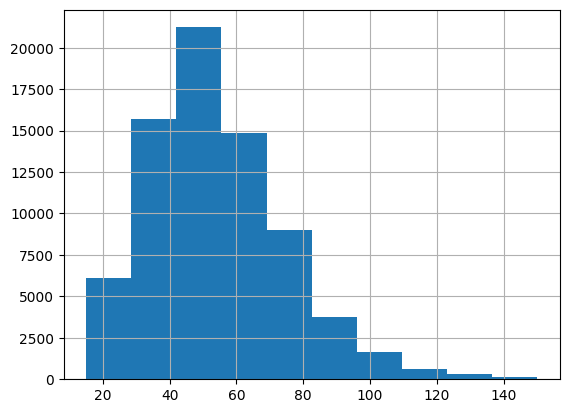

In [10]:
# Title Distribution of question lengths

df['Title'].str.len().hist()

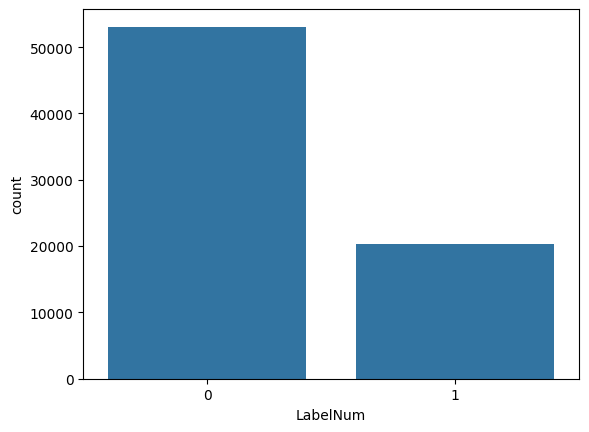

In [11]:
#The Below Count Plot shows that the dataset is imbalanced as it's obvious that android class is exceeding the ios by approximately 30,000 records.
# 0 = Android, 1 = IOS
sns.countplot(x='LabelNum', data=df)
plt.show()

### **Below is the WordCloud to Visualize the Most frequent words in questions asked 'Title' regarding both classes: ios and Android respectively)**

In [12]:
tmp1= df[df['LabelNum']==1]
tmp1

,Title,Body,LabelNum
7,iPhone 5 iOS7 no sound only vibrates when ring...,Here is what I tried...</p>\n\n<ol>\n<li><code...,1
9,Is this an iCloud sync/backup or do I have a d...,What are these pictures showing my iPhone's sc...,1
10,Ping command with parameters from iPhone,How I can execute ping command with parameter ...,1
13,Transferring iPhone message history to new Mac?,My filesystem was corrupted when updating to H...,1
24,edit server in iphone exchange email,We used to use Mobile Iron to configure our us...,1
...,...,...,...
10981,Is there a way to force iPad to show a mobile ...,I'm trying to access an internal website to vi...,1
10982,Windows: Can I set the folder where iTunes bac...,I have a PC running Windows 10 with 2 Hard dri...,1
10990,Sky blue dot next to app,I got an iPhone 7+ on iOS 10.2 and I just got ...,1
10995,How do I find out which folder an app is in in...,"In older versions of iOS, if I searched for an...",1


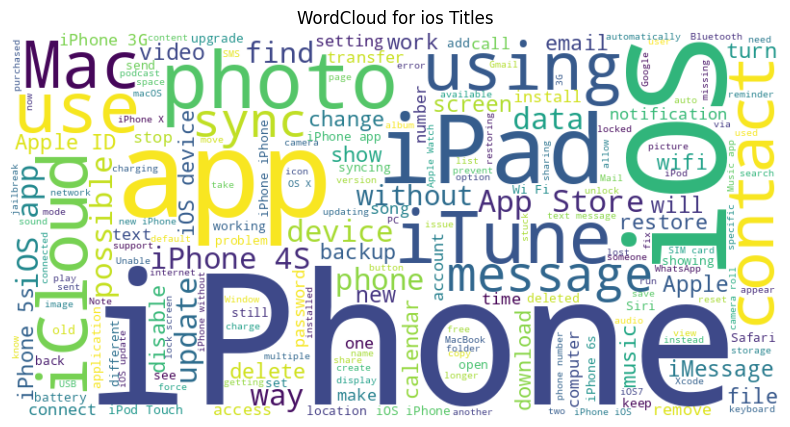

In [13]:
wc_txt = ' '.join(tmp1['Title'])


wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(wc_txt)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('WordCloud for ios Titles')
plt.axis("off")
plt.show()

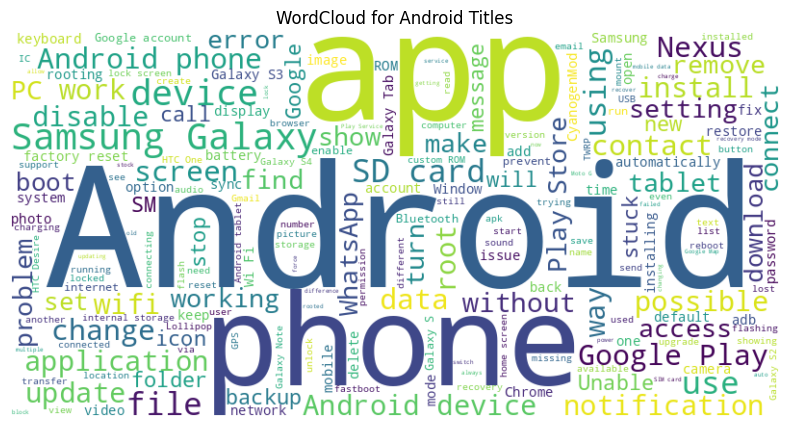

In [14]:
tmp2= df[df['LabelNum']==0]
wc_txt1 = ' '.join(tmp2['Title'])


wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(wc_txt1)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('WordCloud for Android Titles')
plt.axis("off")
plt.show()


## **Text Preprocessing**

In [15]:
#Tokenize the attributes "Title", "Body"
df['Title'] = df['Title'].apply(lambda x: word_tokenize(x))
df['Body'] = df['Body'].apply(lambda x: word_tokenize(x))
df

,Title,Body,LabelNum
0,"[Drop\stop, mobile, data, connection, (, non-w...","[Can, I, set, Android, 4.4.2, to, drop, mobile...",0
1,"[How, to, automatically, crop, text, messages,...","[Is, there, a, way, to, prevent, the, Messages...",0
2,"[Ca, n't, find, text, message, that, was, to, ...","[When, John, Doe, texts, to, a, group, that, i...",0
3,"[Ca, n't, store, contacts, on, my, Android, ph...","[I, was, going, through, all, of, my, installe...",0
4,"[Dropbox, on, Samsung, Galaxy, -, where, is, t...","[On, a, Sony, Xperia, ,, the, settings, button...",0
...,...,...,...
11003,"[Disable, vibrations, for, notifications, on, ...","[I, have, a, Xiaomi, Mi, A3, on, Android, 9, ....",0
11004,"[Download, and, run, Android, APK, files]","[I, want, to, download, BitTorrent, Sync, to, ...",0
11005,"[Android, apps, keep, crashing, with, android....","[Starting, yesterday, ,, my, Galaxy, s2, devic...",0
11006,"[Can, you, get, viruses, on, iPhone, from, dow...","[I, downloaded, an, app, for, downloading, thi...",1


In [16]:
#Use Lemmatize the tokenized text to reduce words to their base form and takes into account the context.
lemmatizer = WordNetLemmatizer()
df['Title'] = df['Title'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df['Body'] = df['Body'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df

,Title,Body,LabelNum
0,"[Drop\stop, mobile, data, connection, (, non-w...","[Can, I, set, Android, 4.4.2, to, drop, mobile...",0
1,"[How, to, automatically, crop, text, message, ...","[Is, there, a, way, to, prevent, the, Messages...",0
2,"[Ca, n't, find, text, message, that, wa, to, a...","[When, John, Doe, text, to, a, group, that, in...",0
3,"[Ca, n't, store, contact, on, my, Android, phone]","[I, wa, going, through, all, of, my, installed...",0
4,"[Dropbox, on, Samsung, Galaxy, -, where, is, t...","[On, a, Sony, Xperia, ,, the, setting, button,...",0
...,...,...,...
11003,"[Disable, vibration, for, notification, on, Xi...","[I, have, a, Xiaomi, Mi, A3, on, Android, 9, ....",0
11004,"[Download, and, run, Android, APK, file]","[I, want, to, download, BitTorrent, Sync, to, ...",0
11005,"[Android, apps, keep, crashing, with, android....","[Starting, yesterday, ,, my, Galaxy, s2, devic...",0
11006,"[Can, you, get, virus, on, iPhone, from, downl...","[I, downloaded, an, app, for, downloading, thi...",1


In [17]:
#remove stopwords such as  "a," "an," "the," "is," "and," "in"
stop_words = set(stopwords.words('english'))
df['Title'] = df['Title'].apply(lambda x: [word for word in x if word not in stop_words])
df['Body'] = df['Body'].apply(lambda x: [word for word in x if word not in stop_words])
df

,Title,Body,LabelNum
0,"[Drop\stop, mobile, data, connection, (, non-w...","[Can, I, set, Android, 4.4.2, drop, mobile, da...",0
1,"[How, automatically, crop, text, message, SMS,...","[Is, way, prevent, Messages, app, sending, lon...",0
2,"[Ca, n't, find, text, message, wa, group]","[When, John, Doe, text, group, includes, ,, ap...",0
3,"[Ca, n't, store, contact, Android, phone]","[I, wa, going, installed, application, phone, ...",0
4,"[Dropbox, Samsung, Galaxy, -, Settings, button...","[On, Sony, Xperia, ,, setting, button, Dropbox...",0
...,...,...,...
11003,"[Disable, vibration, notification, Xiaomi, Mi,...","[I, Xiaomi, Mi, A3, Android, 9, ., I, want, di...",0
11004,"[Download, run, Android, APK, file]","[I, want, download, BitTorrent, Sync, synchron...",0
11005,"[Android, apps, keep, crashing, android.databa...","[Starting, yesterday, ,, Galaxy, s2, device, r...",0
11006,"[Can, get, virus, iPhone, downloaded, app, ?]","[I, downloaded, app, downloading, thing, inter...",1


In [18]:
#remove punctuations
df['Title'] = df['Title'].apply(lambda x: [word for word in x if word not in string.punctuation])
df['Body'] = df['Body'].apply(lambda x: [word for word in x if word not in string.punctuation])
df

,Title,Body,LabelNum
0,"[Drop\stop, mobile, data, connection, non-wifi...","[Can, I, set, Android, 4.4.2, drop, mobile, da...",0
1,"[How, automatically, crop, text, message, SMS,...","[Is, way, prevent, Messages, app, sending, lon...",0
2,"[Ca, n't, find, text, message, wa, group]","[When, John, Doe, text, group, includes, appea...",0
3,"[Ca, n't, store, contact, Android, phone]","[I, wa, going, installed, application, phone, ...",0
4,"[Dropbox, Samsung, Galaxy, Settings, button]","[On, Sony, Xperia, setting, button, Dropbox, t...",0
...,...,...,...
11003,"[Disable, vibration, notification, Xiaomi, Mi,...","[I, Xiaomi, Mi, A3, Android, 9, I, want, disab...",0
11004,"[Download, run, Android, APK, file]","[I, want, download, BitTorrent, Sync, synchron...",0
11005,"[Android, apps, keep, crashing, android.databa...","[Starting, yesterday, Galaxy, s2, device, runn...",0
11006,"[Can, get, virus, iPhone, downloaded, app]","[I, downloaded, app, downloading, thing, inter...",1


In [19]:
#Apply lowercase
df['Title'] = df['Title'].apply(lambda x: [word.lower() for word in x])
df['Body'] = df['Body'].apply(lambda x: [word.lower() for word in x])
df

,Title,Body,LabelNum
0,"[drop\stop, mobile, data, connection, non-wifi...","[can, i, set, android, 4.4.2, drop, mobile, da...",0
1,"[how, automatically, crop, text, message, sms,...","[is, way, prevent, messages, app, sending, lon...",0
2,"[ca, n't, find, text, message, wa, group]","[when, john, doe, text, group, includes, appea...",0
3,"[ca, n't, store, contact, android, phone]","[i, wa, going, installed, application, phone, ...",0
4,"[dropbox, samsung, galaxy, settings, button]","[on, sony, xperia, setting, button, dropbox, t...",0
...,...,...,...
11003,"[disable, vibration, notification, xiaomi, mi,...","[i, xiaomi, mi, a3, android, 9, i, want, disab...",0
11004,"[download, run, android, apk, file]","[i, want, download, bittorrent, sync, synchron...",0
11005,"[android, apps, keep, crashing, android.databa...","[starting, yesterday, galaxy, s2, device, runn...",0
11006,"[can, get, virus, iphone, downloaded, app]","[i, downloaded, app, downloading, thing, inter...",1
